In [97]:
# Importing the libraries

import numpy as np
import pandas as pd
from collections import Counter

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# Collecting data

In [98]:
### Fetching the datsets

df = pd.read_csv('cubic_zirconia.csv')

In [99]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


Data  Description

Carat:Carat weight of the cubic zirconia. Cut: Describe the cut quality of the cubic zirconia. 
Quality is increasing order Fair, Good, Very Good,Premium,Ideal. Color: Colour of the cubic zirconia.
With D being the best and J the worst. Clarity :cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. 
(In order from Best to Worst, FL = 1. flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 Depth : The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter. 
Table : The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter. 
Price : the Price of the cubic zirconia. X : Length of the cubic zirconia in mm. Y : Width of the cubic zirconia in mm. Z : Height of the cubic zirconia in mm.

In [100]:
# Checking shape of the database
df.shape

(26967, 11)

In [101]:
# checking info of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [102]:
#checking null  values
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [103]:
# Checking the percentage of Missing Values
def percentage_missing(data):
        for i in data:
            percent = ((df[i].isnull().sum()/len(df))*100)
            print(f'The column {i} has missing value percentage  is {round(percent,2)} %')

In [104]:
# THis shows missing value percentage 
percentage_missing(df)

The column Unnamed: 0 has missing value percentage  is 0.0 %
The column carat has missing value percentage  is 0.0 %
The column cut has missing value percentage  is 0.0 %
The column color has missing value percentage  is 0.0 %
The column clarity has missing value percentage  is 0.0 %
The column depth has missing value percentage  is 2.58 %
The column table has missing value percentage  is 0.0 %
The column x has missing value percentage  is 0.0 %
The column y has missing value percentage  is 0.0 %
The column z has missing value percentage  is 0.0 %
The column price has missing value percentage  is 0.0 %


In [105]:
# Removing Null values of clarity column as it is only 3 %
df.dropna(axis=0 , inplace =True)

In [106]:
#checking null  values
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [107]:
### Summary statistics of the numerical columns in the dataset
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000
mean,13487.106509,0.797995,61.745147,57.456011,5.729167,5.732967,3.536636,3937.973734
std,7782.720039,0.477214,1.412860,2.230776,1.127515,1.166330,0.699335,4022.189341
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6741.250000,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,13497.500000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,20223.750000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5361.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


In [108]:
### Understanding the distribution of the numerical column

def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

In [109]:
col = ['carat','depth', 'table', 'x',
       'y', 'z', 'price']

# Univariate Analysis

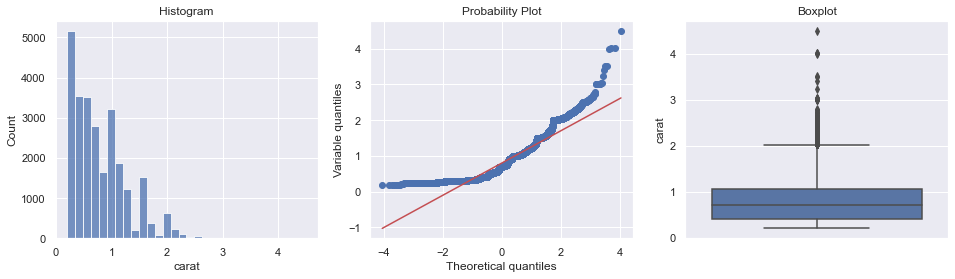

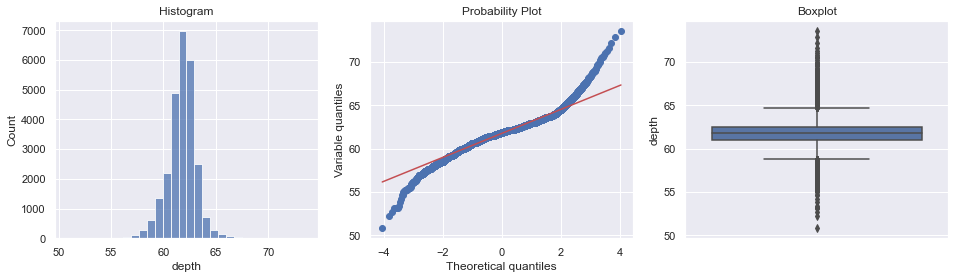

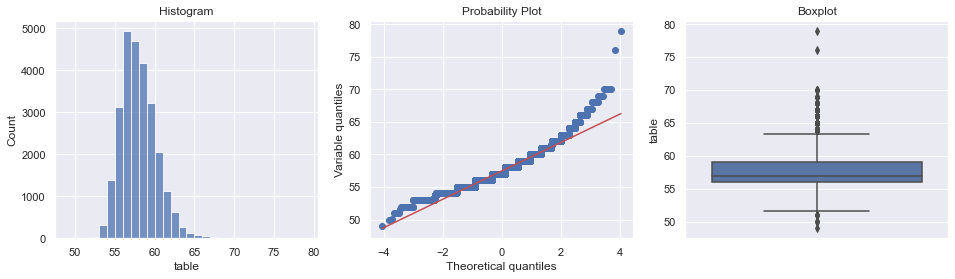

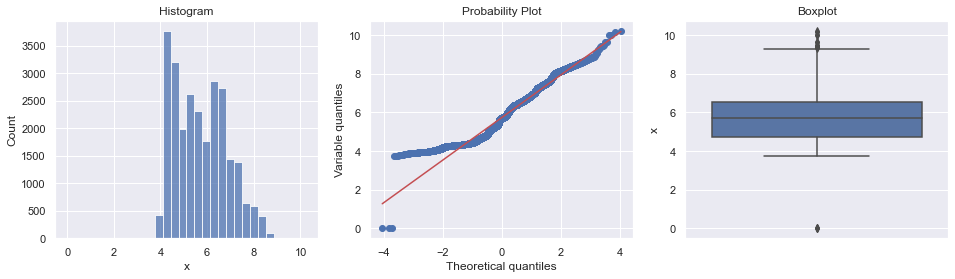

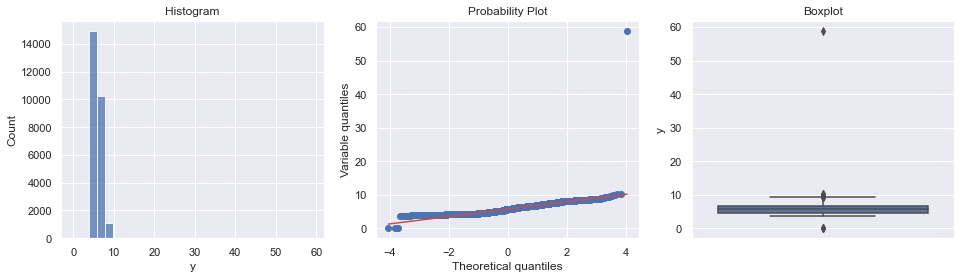

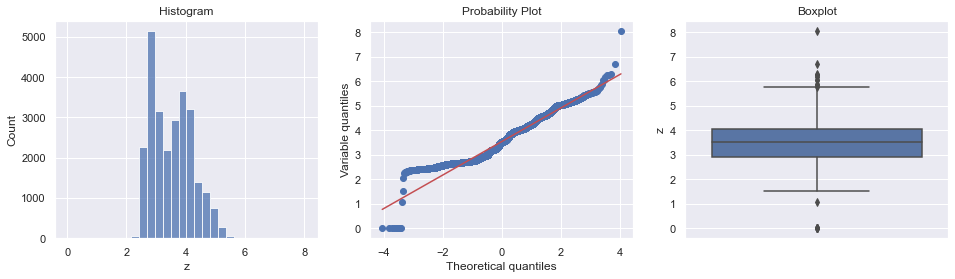

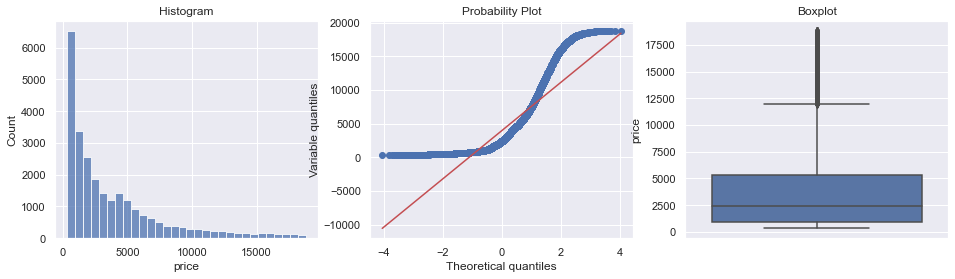

In [110]:
# Making Plots of all columns having numerical values
for i in col:
    diagnostic_plots(df, i)
# Here we can see lot of outlier in the boxplot which we will  remove later on 

In [111]:
for i in df.columns:
    print(f'{i} column has length of unique values {len(df[i].unique())}')                                                   

Unnamed: 0 column has length of unique values 26270
carat column has length of unique values 256
cut column has length of unique values 5
color column has length of unique values 7
clarity column has length of unique values 8
depth column has length of unique values 169
table column has length of unique values 112
x column has length of unique values 530
y column has length of unique values 525
z column has length of unique values 354
price column has length of unique values 8629


In [112]:
col1 = ['carat','cut','color','clarity']

In [113]:
# Checking unique values of color column
df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

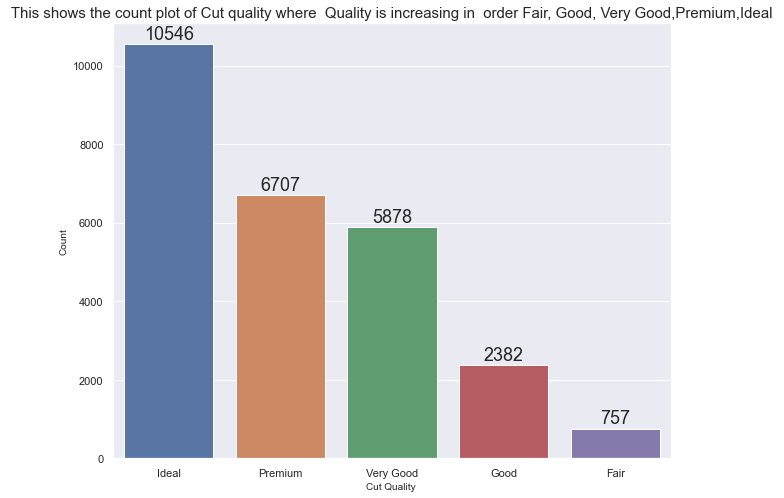

In [114]:
plt.figure(figsize=(10,8))
pd =sns.countplot(x = "cut" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("Cut Quality ", size=10)
plt.ylabel("Count" ,size=10)
plt.title (" This shows the count plot of Cut quality where  Quality is increasing in  order Fair, Good, Very Good,Premium,Ideal " , size=15)
plt.show()


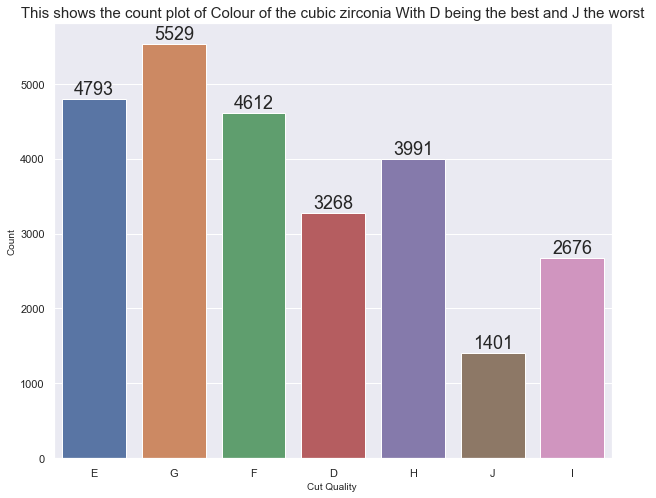

In [115]:
plt.figure(figsize=(10,8))
pd =sns.countplot(x = "color" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("Cut Quality ", size=10)
plt.ylabel("Count" ,size=10)
plt.title (" This shows the count plot of Colour of the cubic zirconia With D being the best and J the worst " , size=15)
plt.show()
# Here G has the maximum  count

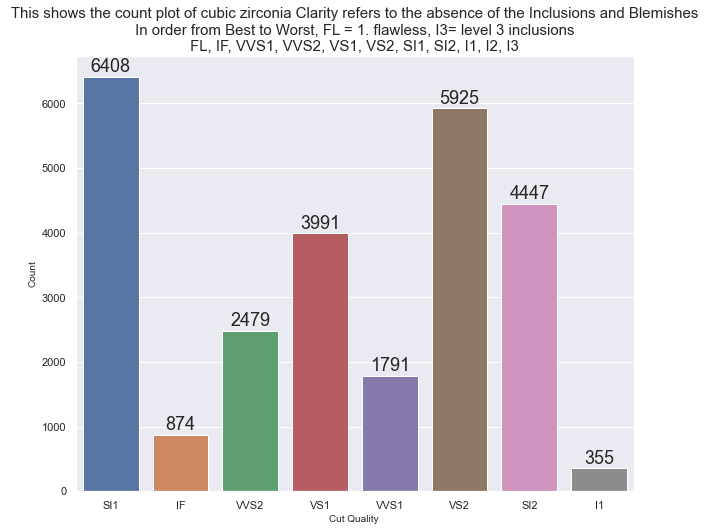

In [116]:
plt.figure(figsize=(10,8))
pd =sns.countplot(x = "clarity" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("Cut Quality ", size=10)
plt.ylabel("Count" ,size=10)
plt.title (" This shows the count plot of cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes \n In order from Best to Worst, FL = 1. flawless, I3= level 3 inclusions \n FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 " , size=15)
plt.show()
# Here SI1 has maximum count

# Bivariate analysis

In [117]:
col3 = ['carat','depth', 'table', 'x','y', 'z']

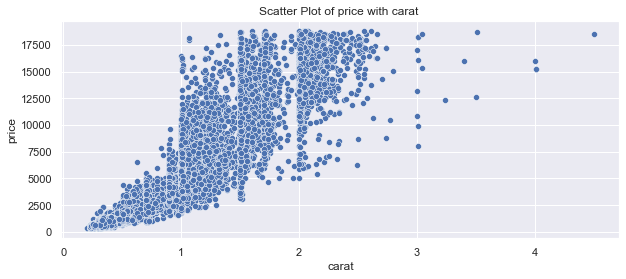

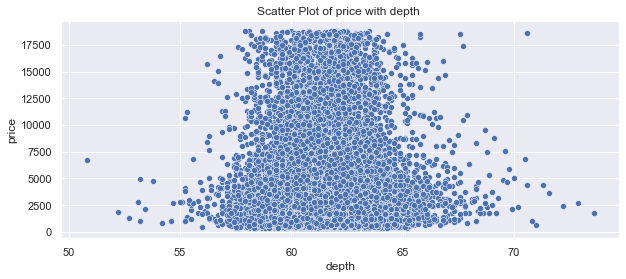

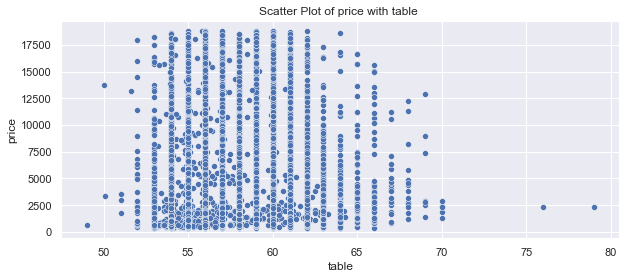

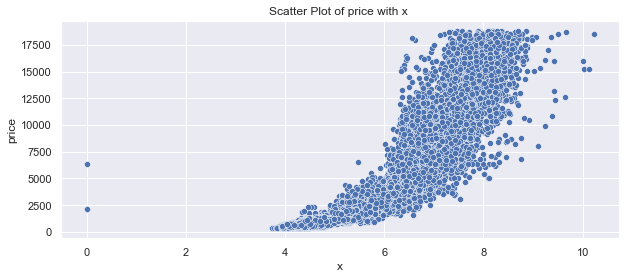

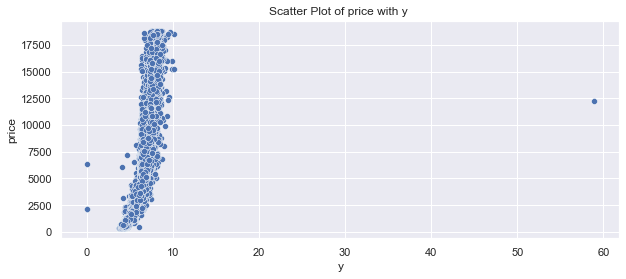

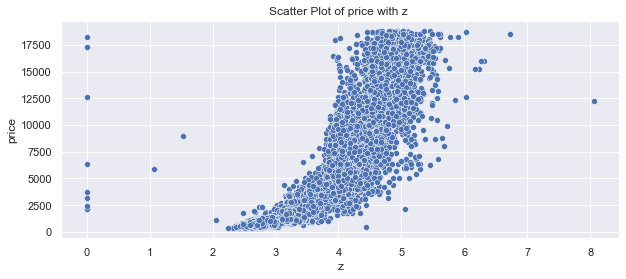

In [118]:
for i in col3:
    plt.figure(figsize=(10,4))
    sns.scatterplot(data = df, x = i , y = "price").set(title=f'Scatter Plot of price with {i} ')

In [119]:
# Here we can see outliers which we have to remove.

In [120]:
# Creating  function to  remove outlier 
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [121]:
for column in col3:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

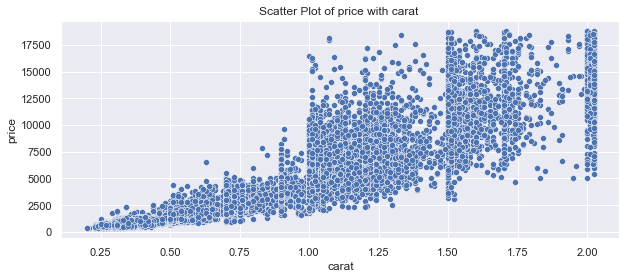

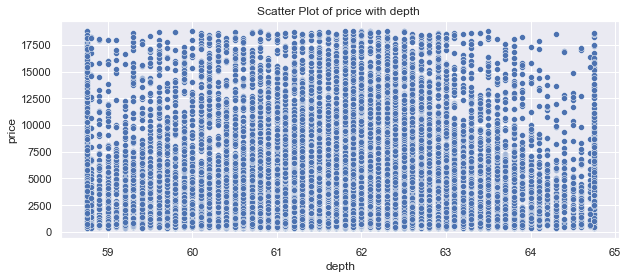

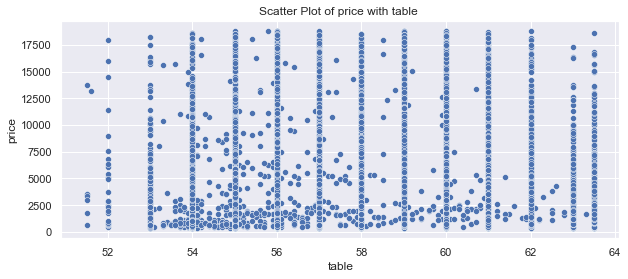

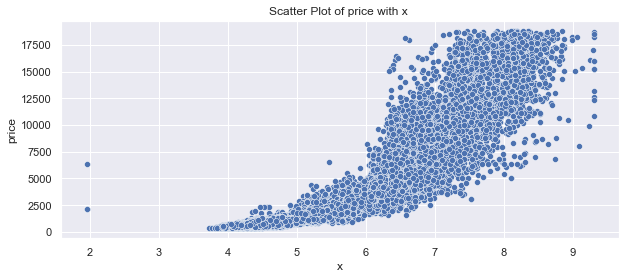

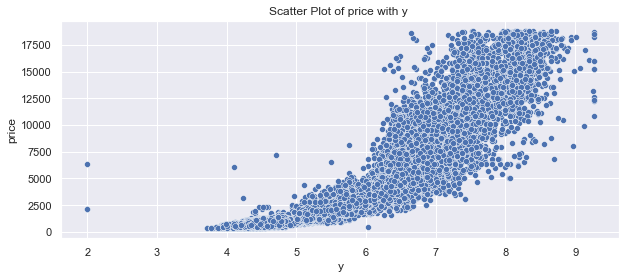

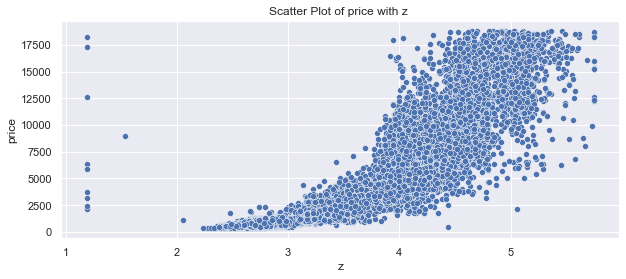

In [122]:
# Now checking scatter plot after removing outliers 
for i in col3:
    plt.figure(figsize=(10,4))
    sns.scatterplot(data = df, x = i , y = "price").set(title=f'Scatter Plot of price with {i} ')

In [123]:
# here we can see the conclusion that column carat , x , y, z have linear relation with  price.

# Multivariate analysis

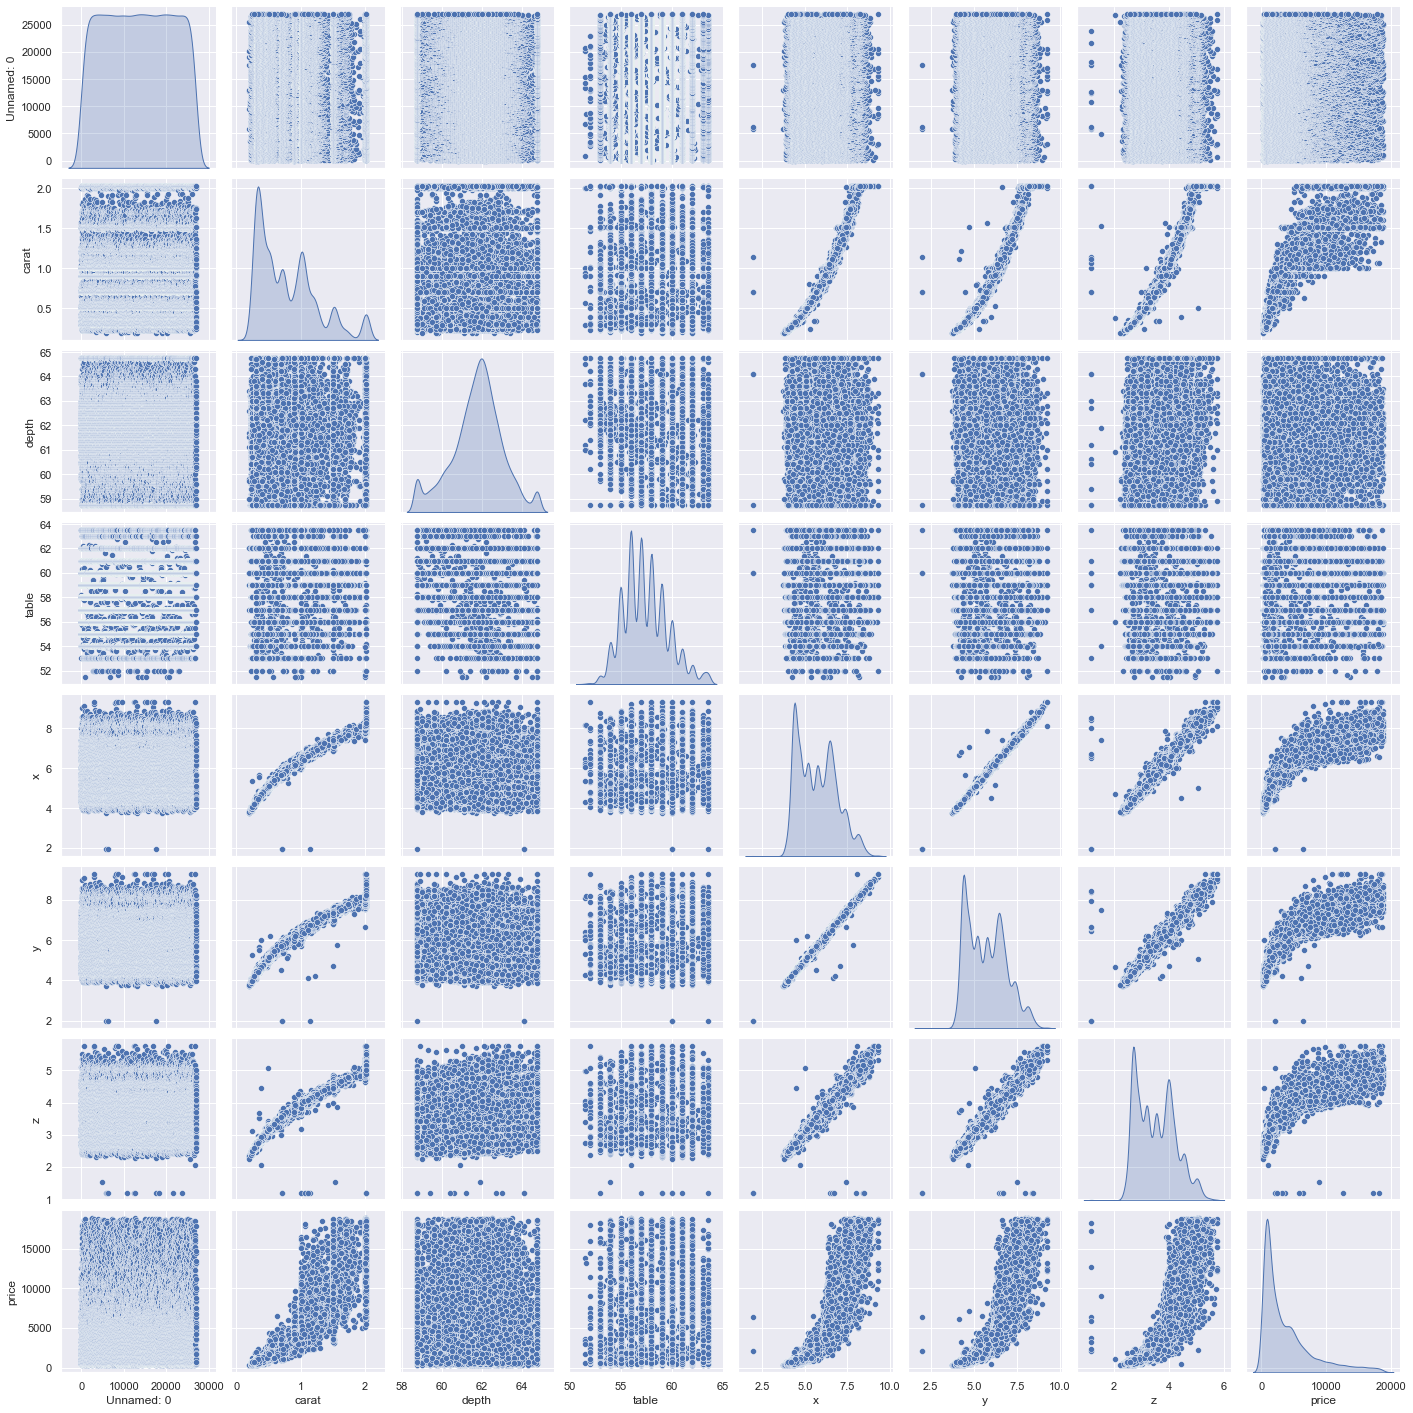

In [124]:
sns.set(rc={"figure.figsize":(20, 18)})
sns.pairplot(df, diag_kind='kde' )